#EDA

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

FilePath = '/content/drive/MyDrive/ML-Project/weatherAUS.csv'


In [69]:
DF = pd.read_csv(FilePath,delimiter=',')
# removing risk MM as mentioned by the data source
DF = DF.drop( columns=['RISK_MM'])

print(DF.shape)
DF.head()

(142193, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [70]:
DF.info()
#checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [71]:
columns = DF.columns

#checking null count
for c in columns:
  print('null count in',c,'=',DF[c].isnull().sum())

null count in Date = 0
null count in Location = 0
null count in MinTemp = 637
null count in MaxTemp = 322
null count in Rainfall = 1406
null count in Evaporation = 60843
null count in Sunshine = 67816
null count in WindGustDir = 9330
null count in WindGustSpeed = 9270
null count in WindDir9am = 10013
null count in WindDir3pm = 3778
null count in WindSpeed9am = 1348
null count in WindSpeed3pm = 2630
null count in Humidity9am = 1774
null count in Humidity3pm = 3610
null count in Pressure9am = 14014
null count in Pressure3pm = 13981
null count in Cloud9am = 53657
null count in Cloud3pm = 57094
null count in Temp9am = 904
null count in Temp3pm = 2726
null count in RainToday = 1406
null count in RainTomorrow = 0


In [72]:
# Removing Text Date and adding individual columns for Year month and day
DF['Date'] = pd.to_datetime(DF['Date'])
DF['Year'] = DF['Date'].dt.year
DF['Month'] = DF['Date'].dt.month
DF['Day'] = DF['Date'].dt.day
DF=DF.drop(['Date'],axis=1)
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

In [73]:
y = DF[['RainTomorrow']]
DF=DF.drop(columns = ['RainTomorrow'])

# splitting features and target feature
DF,y

(       Location  MinTemp  MaxTemp  Rainfall  ...  RainToday  Year Month  Day
 0        Albury     13.4     22.9       0.6  ...         No  2008    12    1
 1        Albury      7.4     25.1       0.0  ...         No  2008    12    2
 2        Albury     12.9     25.7       0.0  ...         No  2008    12    3
 3        Albury      9.2     28.0       0.0  ...         No  2008    12    4
 4        Albury     17.5     32.3       1.0  ...         No  2008    12    5
 ...         ...      ...      ...       ...  ...        ...   ...   ...  ...
 142188    Uluru      3.5     21.8       0.0  ...         No  2017     6   20
 142189    Uluru      2.8     23.4       0.0  ...         No  2017     6   21
 142190    Uluru      3.6     25.3       0.0  ...         No  2017     6   22
 142191    Uluru      5.4     26.9       0.0  ...         No  2017     6   23
 142192    Uluru      7.8     27.0       0.0  ...         No  2017     6   24
 
 [142193 rows x 24 columns],        RainTomorrow
 0           

In [74]:
# listing columns based on dtypes for future use
numerical_col = [i for i in DF.columns if (DF[i].dtype=='float64' or DF[i].dtype=='int64')]
objects_col = [i for i in DF.columns if DF[i].dtype=='object']

print(numerical_col)
print(objects_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [75]:
y = y.replace(to_replace={'Yes':1,'No':0})
y

,RainTomorrow
0,0
1,0
2,0
3,0
4,0
...,...
142188,0
142189,0
142190,0
142191,0


In [76]:
display(DF)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,2017,6,20
142189,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,2017,6,21
142190,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,2017,6,22
142191,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,2017,6,23


In [77]:
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(DF, y, test_size=0.2, stratify=y, random_state=0)
X_train.info()
pd.DataFrame(y_train).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113754 entries, 1041 to 62310
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       113754 non-null  object 
 1   MinTemp        113245 non-null  float64
 2   MaxTemp        113504 non-null  float64
 3   Rainfall       112654 non-null  float64
 4   Evaporation    65155 non-null   float64
 5   Sunshine       59600 non-null   float64
 6   WindGustDir    106293 non-null  object 
 7   WindGustSpeed  106342 non-null  float64
 8   WindDir9am     105740 non-null  object 
 9   WindDir3pm     110743 non-null  object 
 10  WindSpeed9am   112682 non-null  float64
 11  WindSpeed3pm   111641 non-null  float64
 12  Humidity9am    112335 non-null  float64
 13  Humidity3pm    110866 non-null  float64
 14  Pressure9am    102591 non-null  float64
 15  Pressure3pm    102616 non-null  float64
 16  Cloud9am       70770 non-null   float64
 17  Cloud3pm       68088 non-nu

In [78]:
# removing columns with NAN values in Rain Today
DF = DF.dropna(subset=['RainToday'])
c = 'RainToday'
print('null count in',c,'=',DF[c].isnull().sum())

null count in RainToday = 0


In [79]:
# Listing the number of unique values in every object datatype column
for var in objects_col: 
    print('Unique in',var,'=',len(X_train[var].unique()))
    print(X_train[var].value_counts())

Unique in Location = 49
Canberra            2739
Sydney              2686
Hobart              2548
Perth               2544
Darwin              2538
Brisbane            2528
Adelaide            2481
Albury              2439
Launceston          2433
Portland            2426
Bendigo             2423
Sale                2423
MelbourneAirport    2420
AliceSprings        2420
Townsville          2419
Albany              2417
PerthAirport        2415
MountGambier        2413
Ballarat            2413
Dartmoor            2411
Mildura             2409
Nuriootpa           2399
SydneyAirport       2395
Cairns              2389
Tuggeranong         2381
Watsonia            2381
WaggaWagga          2380
Cobar               2379
NorfolkIsland       2378
SalmonGums          2375
CoffsHarbour        2370
Woomera             2364
GoldCoast           2357
Wollongong          2355
BadgerysCreek       2353
Witchcliffe         2349
Newcastle           2347
NorahHead           2346
Richmond            2340
P

In [80]:
# Filling NAN values with mode of the training data
t = X_train.median()
X_train = X_train.fillna(t)
X_test = X_test.fillna(t)

for t_df in [X_train, X_test]:
    t_df['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    t_df['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    t_df['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    t_df['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [81]:
# reviewing NAN count after replacement
for c in X_train.columns:
  print('null count in',c,'=',X_train[c].isnull().sum())

null count in Location = 0
null count in MinTemp = 0
null count in MaxTemp = 0
null count in Rainfall = 0
null count in Evaporation = 0
null count in Sunshine = 0
null count in WindGustDir = 0
null count in WindGustSpeed = 0
null count in WindDir9am = 0
null count in WindDir3pm = 0
null count in WindSpeed9am = 0
null count in WindSpeed3pm = 0
null count in Humidity9am = 0
null count in Humidity3pm = 0
null count in Pressure9am = 0
null count in Pressure3pm = 0
null count in Cloud9am = 0
null count in Cloud3pm = 0
null count in Temp9am = 0
null count in Temp3pm = 0
null count in RainToday = 0
null count in Year = 0
null count in Month = 0
null count in Day = 0


In [82]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
1041,Albury,8.1,23.5,0.0,4.8,8.5,W,33.0,ENE,WSW,4.0,19.0,54.0,36.0,1018.1,1014.3,5.0,5.0,17.0,22.6,No,2011,11,21
139168,Katherine,18.8,35.4,0.0,8.0,8.5,SE,41.0,ESE,ESE,13.0,20.0,69.0,32.0,1014.7,1011.4,0.0,1.0,26.5,34.7,No,2013,4,25
125791,Walpole,10.2,22.7,0.0,4.8,8.5,S,31.0,S,SSE,11.0,15.0,65.0,67.0,1019.6,1017.7,5.0,5.0,19.7,20.3,No,2014,12,27
85966,Cairns,23.2,31.0,79.0,4.8,3.3,S,26.0,SSE,ENE,9.0,13.0,80.0,66.0,1008.1,1006.0,7.0,7.0,26.3,29.0,Yes,2012,1,16
134284,AliceSprings,20.1,29.9,0.0,17.8,10.6,S,52.0,S,SE,30.0,26.0,23.0,12.0,1016.6,1011.5,7.0,5.0,24.1,28.8,No,2012,10,25


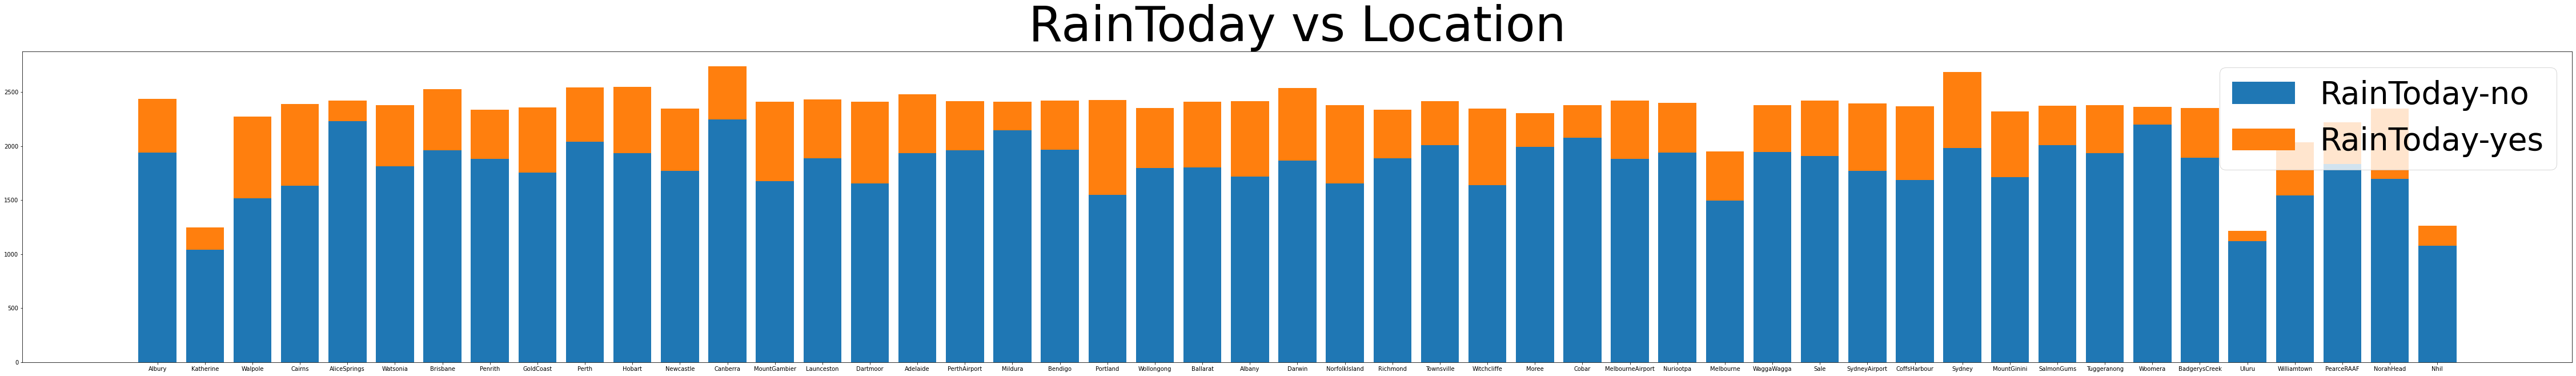

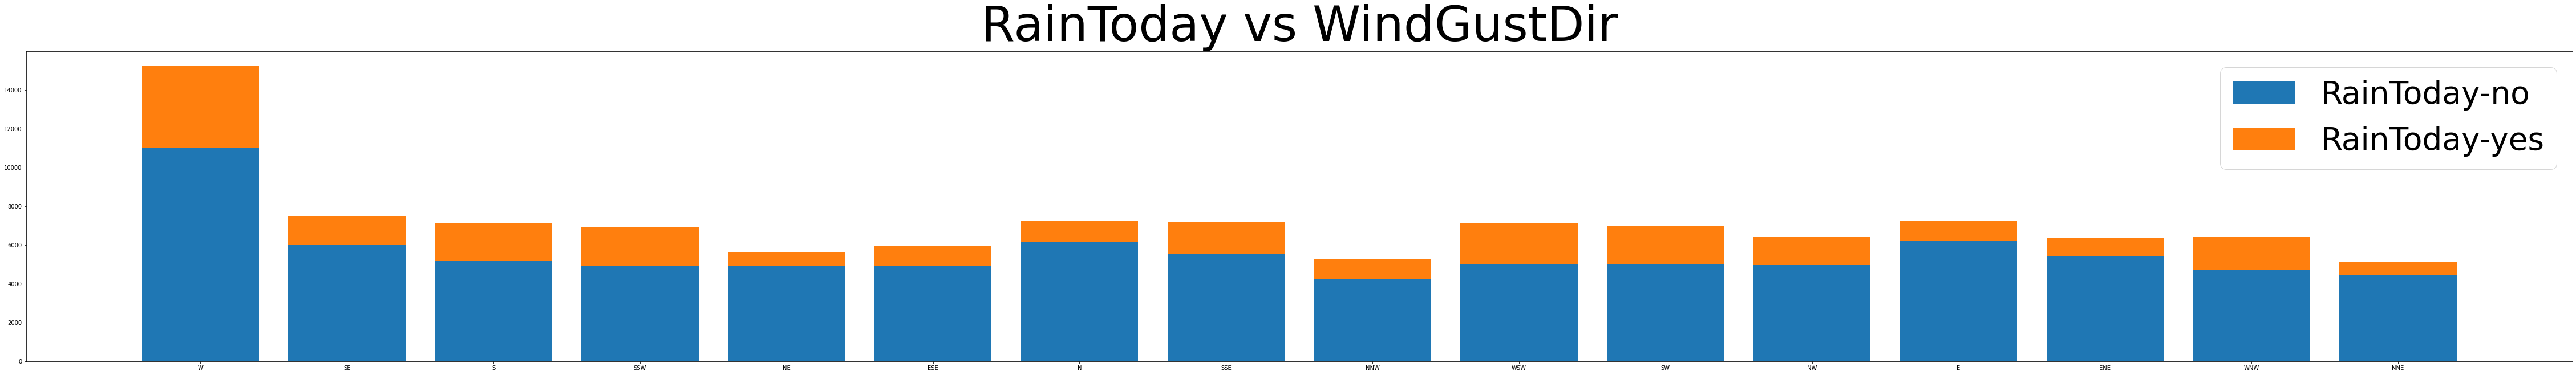

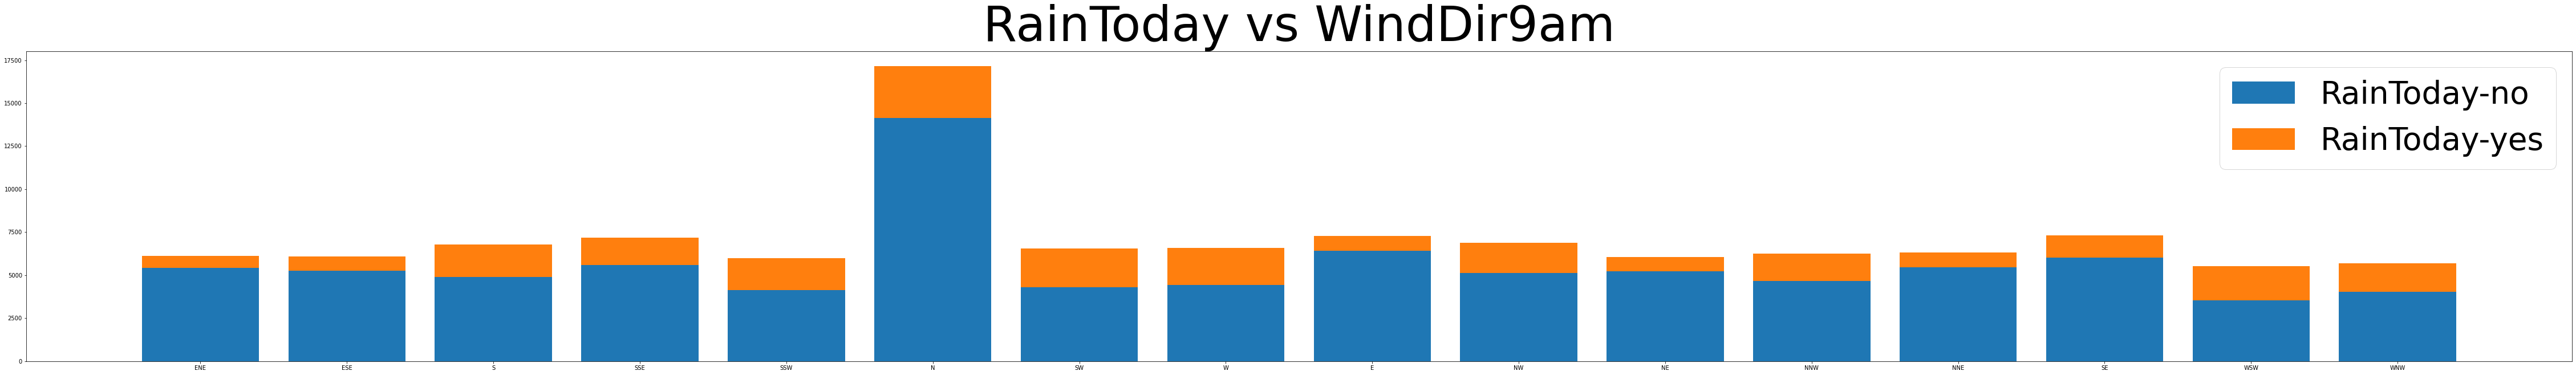

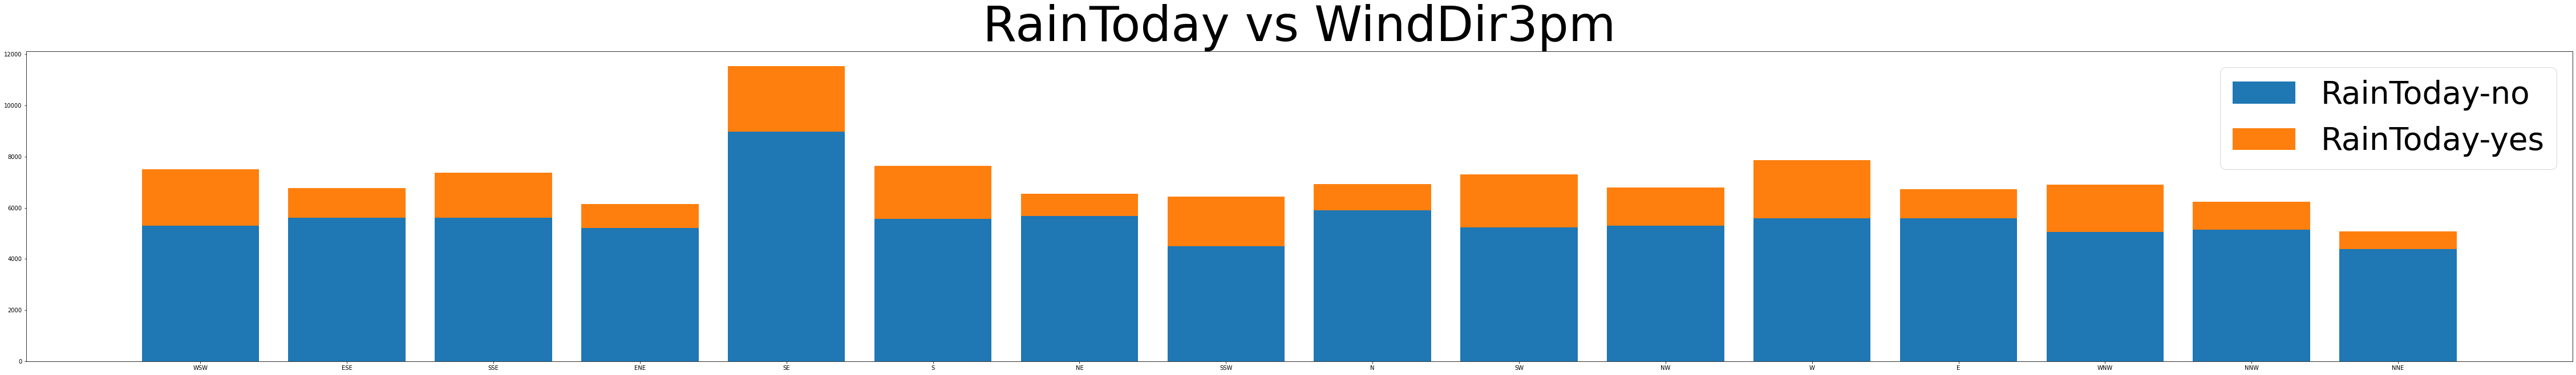

In [83]:
# visualizing different relations between rain today and other features
num=[]
for var in objects_col[:-1]:
  x=[]
  y=[]
  f= X_train[var].unique()
  for i in f:
    X=X_train.loc[X_train[var] == i,[var,'RainToday']]
    Y=X['RainToday'].value_counts()
    x.append(i)
    y.append(Y.to_numpy())
  y=np.array(y)
  fig= plt.figure(figsize=(80,10))
  ax = plt.subplot()
  ax.bar(x, y[:,0], label='RainToday-no')
  ax.bar(x, y[:,1], bottom=y[:,0], label='RainToday-yes')
  plt.title("RainToday vs "+var,fontsize = 85)
  plt.legend(prop={"size":55})
  plt.show()

In [84]:
# one hot encoding for wind direction
X_train = pd.concat([X_train[numerical_col], pd.get_dummies(X_train.Location,prefix='Location'),
                     pd.get_dummies(X_train.WindGustDir,prefix='WindGustDir'),
                     pd.get_dummies(X_train.WindDir9am,prefix='WindDir9am'),
                     pd.get_dummies(X_train.WindDir3pm,prefix='WindDir3pm'),
                     pd.get_dummies(X_train.RainToday,prefix='RainToday')], axis=1)
#DF=DF.drop(['Location'],axis=1)
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,...,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
1041,8.1,23.5,0.0,4.8,8.5,33.0,4.0,19.0,54.0,36.0,1018.1,1014.3,5.0,5.0,17.0,22.6,2011,11,21,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
139168,18.8,35.4,0.0,8.0,8.5,41.0,13.0,20.0,69.0,32.0,1014.7,1011.4,0.0,1.0,26.5,34.7,2013,4,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
125791,10.2,22.7,0.0,4.8,8.5,31.0,11.0,15.0,65.0,67.0,1019.6,1017.7,5.0,5.0,19.7,20.3,2014,12,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
85966,23.2,31.0,79.0,4.8,3.3,26.0,9.0,13.0,80.0,66.0,1008.1,1006.0,7.0,7.0,26.3,29.0,2012,1,16,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
134284,20.1,29.9,0.0,17.8,10.6,52.0,30.0,26.0,23.0,12.0,1016.6,1011.5,7.0,5.0,24.1,28.8,2012,10,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [85]:
X_test = pd.concat([X_test[numerical_col], pd.get_dummies(X_test.Location,prefix='Location'),
                     pd.get_dummies(X_test.WindGustDir,prefix='WindGustDir'),
                     pd.get_dummies(X_test.WindDir9am,prefix='WindDir9am'),
                     pd.get_dummies(X_test.WindDir3pm,prefix='WindDir3pm'),
                     pd.get_dummies(X_test.RainToday,prefix='RainToday')], axis=1)
#DF=DF.drop(['Location'],axis=1)
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,...,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
124891,16.7,32.6,0.0,4.8,8.5,30.0,13.0,15.0,63.0,72.0,1008.0,1005.6,5.0,5.0,26.0,26.0,2012,1,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
128693,14.1,22.7,0.0,2.4,3.4,28.0,15.0,7.0,78.0,56.0,1017.6,1012.7,5.0,5.0,17.1,21.9,2014,4,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
27096,1.2,13.4,0.0,1.8,8.5,19.0,7.0,7.0,99.0,56.0,1027.6,1025.3,5.0,5.0,5.4,13.3,2010,7,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
139741,28.4,39.1,0.0,8.8,8.5,57.0,6.0,7.0,61.0,47.0,1010.4,1005.7,1.0,8.0,32.0,32.5,2014,11,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
50823,12.6,25.0,0.0,4.8,8.5,39.0,13.0,11.0,70.0,55.0,1017.7,1015.3,5.0,5.0,16.7,23.3,2009,1,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [86]:
# checking distribution of data
DF[numerical_col].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,140319.000000,140480.00000,140787.000000,81093.000000,73982.000000,131682.000000,139732.000000,138256.000000,139270.000000,137286.000000,127044.000000,127018.000000,88162.000000,84693.000000,140131.000000,138163.000000,140787.000000,140787.000000,140787.000000
mean,12.184824,23.23512,2.349974,5.472516,7.630540,39.970520,13.990496,18.631141,68.826833,51.449288,1017.654577,1015.257963,4.431161,4.499250,16.987066,21.693183,2012.757492,6.403482,15.714704
std,6.403879,7.11450,8.465173,4.189132,3.781729,13.578201,8.886210,8.798096,19.063650,20.807310,7.104867,7.035411,2.886594,2.719752,6.496012,6.937784,2.542272,3.426583,8.798882
min,-8.500000,-4.80000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,17.90000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.400000,1.000000,2.000000,12.300000,16.600000,2011.000000,3.000000,8.000000
50%,12.000000,22.60000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.30000,0.800000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,2015.000000,9.000000,23.000000
max,33.900000,48.10000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


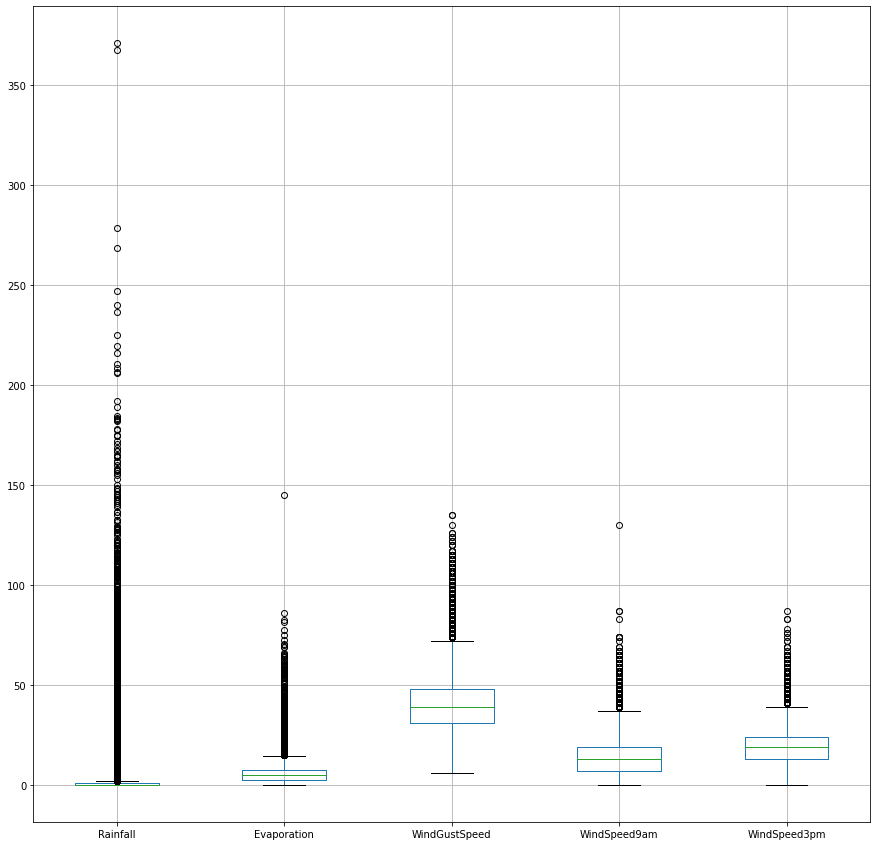

In [87]:
# shortlisting suspecious features
suspecious = ['Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm']
plt.figure(figsize=(15,15))
DF[suspecious].boxplot()

In [88]:
DF[suspecious].quantile(0.99)

Rainfall         37.4
Evaporation      18.4
WindGustSpeed    80.0
WindSpeed9am     39.0
WindSpeed3pm     43.0
Name: 0.99, dtype: float64

In [89]:
# replacing extreme outliers with their respective 99th percentile
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 37.4)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 18.4)
    df3['Evaporation'] = max_value(df3, 'WindGustSpeed', 80)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 39)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 43)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'Location_AliceSprings', 'Location_Woomera', 'WindDir9am_NNW', 'RainToday_No', 'RainToday_Yes', 'RainTomorrow']
21


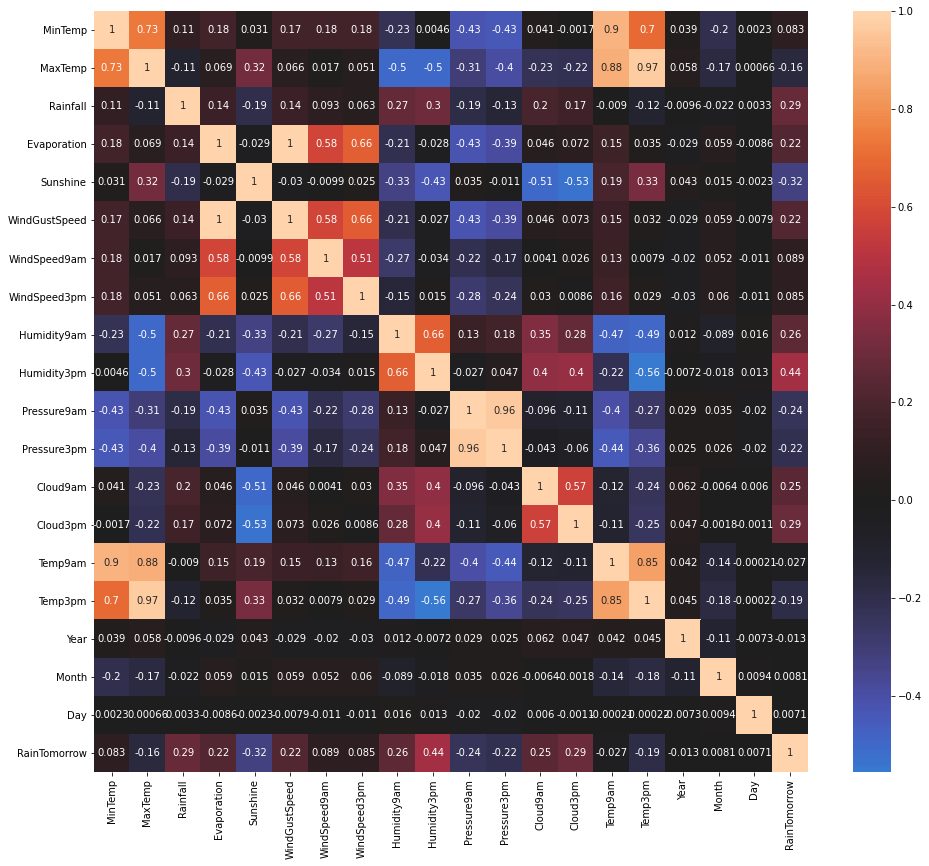

In [90]:
outlier_col = ['Rainfall','Evaporation','WindSpeed9am']
plt.figure(figsize=(16,14))
temp = pd.concat([X_train[numerical_col],y_train],axis = 1)
corr = temp.corr()
sns.heatmap(temp.corr(),annot=True,center = 0,fmt='.2g')
temp2=pd.concat([X_train,y_train],axis = 1)

# plotting the corelation matrix for reducing the number of features
corr = temp2.corr()
index = list(corr.index)
t = corr['RainTomorrow']

final_features = []

for i in range(len(t)):
  if abs(t[i])>=0.05: 
    final_features.append(index[i])

print(final_features)
print(len(final_features))
final_features.remove('RainTomorrow')


X_train = X_train[final_features]
X_test = X_test[final_features]

In [91]:
display(X_train)
print(final_features)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,Location_AliceSprings,Location_Woomera,WindDir9am_NNW,RainToday_No,RainToday_Yes
1041,8.1,23.5,0.0,33.0,8.5,33.0,4.0,19.0,54.0,36.0,1018.1,1014.3,5.0,5.0,22.6,0,0,0,1,0
139168,18.8,35.4,0.0,41.0,8.5,41.0,13.0,20.0,69.0,32.0,1014.7,1011.4,0.0,1.0,34.7,0,0,0,1,0
125791,10.2,22.7,0.0,31.0,8.5,31.0,11.0,15.0,65.0,67.0,1019.6,1017.7,5.0,5.0,20.3,0,0,0,1,0
85966,23.2,31.0,37.4,26.0,3.3,26.0,9.0,13.0,80.0,66.0,1008.1,1006.0,7.0,7.0,29.0,0,0,0,0,1
134284,20.1,29.9,0.0,52.0,10.6,52.0,30.0,26.0,23.0,12.0,1016.6,1011.5,7.0,5.0,28.8,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92305,25.0,32.2,5.2,52.0,7.7,52.0,20.0,31.0,74.0,61.0,1014.9,1011.9,7.0,6.0,31.1,0,0,0,0,1
55116,9.6,23.1,0.0,50.0,8.5,50.0,33.0,22.0,62.0,33.0,1014.5,1014.5,1.0,5.0,20.8,0,0,0,1,0
6311,23.3,37.2,0.0,33.0,11.0,33.0,17.0,7.0,46.0,26.0,1017.3,1015.2,0.0,3.0,34.8,0,0,0,1,0
18143,19.1,28.1,0.0,43.0,8.5,43.0,13.0,20.0,70.0,53.0,1015.4,1010.9,5.0,5.0,25.6,0,0,0,1,0


['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'Location_AliceSprings', 'Location_Woomera', 'WindDir9am_NNW', 'RainToday_No', 'RainToday_Yes']


#Logistic Regression

In [92]:
#importing regressors
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [93]:
logreg = LogisticRegression(C=1,solver='liblinear', random_state=0)

# training of data
logreg.fit(X_train, y_train)

pickle.dump(logreg,open(f"/content/drive/MyDrive/ML-Project/Basic_Logreg.pickle","wb"))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
y_pred_train = logreg.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
#calculating accuracies 
from sklearn.metrics import accuracy_score
print('For correlation cutoff > 0.1 ')
print("Total Number of features = ",len(final_features))
print("----------------")
print('Model test accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Model train accuracy score : {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

For correlation cutoff > 0.1 
Total Number of features =  20
----------------
Model test accuracy score : 0.8405
Model train accuracy score : 0.8435


In [97]:
#null accuracy
v_c=y_test.value_counts()
v_c

RainTomorrow
0               22064
1                6375
dtype: int64

In [98]:
null_accuracy = v_c[0]/sum(v_c)

print(null_accuracy)

RainTomorrow
0               0.775836
dtype: float64


In [99]:
from sklearn.metrics import confusion_matrix
#confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual positive:1'])
cm_matrix

,Predict Negative:0,Predict Positive:1
Actual Negative:0,20818,1246
Actual positive:1,3290,3085


In [100]:
from sklearn.decomposition import PCA
def PAC_fit(X_train,X_test):
    cummilative_variance =0
    pca=PCA(random_state=0)
    X_trains=pca.fit_transform(X_train)
    X_tests=pca.transform(X_test)
    index=0
    variance=pca.explained_variance_ratio_
    while cummilative_variance<0.99:
        cummilative_variance += variance[index]
        index+=1
    return X_trains[:,:index],X_tests[:,:index]

In [101]:

pd.DataFrame(X_train)
print("total features=", X_train.shape)
#X_train,X_test=PAC_fit(X_train,X_test)
print("features after calling PCA with 0.99 variance =", X_train.shape)

total features= (113754, 20)
features after calling PCA with 0.99 variance = (113754, 20)


In [102]:
# training on logistic regression with PCA
logreg = LogisticRegression(C=1,solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [104]:
print("Total features =",len(final_features))
print('Model test accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Model train accuracy score : {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Total features = 20
Model test accuracy score : 0.8405
Model train accuracy score : 0.8435


In [105]:
# random Forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=230, random_state=0,max_depth=22)
clf.fit(X_train, y_train)
pickle.dump(logreg,open(f"/content/drive/MyDrive/ML-Project/Basic_RandomForest.pickle","wb"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [ ]:
# random Forest
from sklearn.svm import SVC

clf = SVC(kernel = 'poly',coef0 = 3)
clf.fit(X_train, y_train)
pickle.dump(logreg,open(f"/content/drive/MyDrive/ML-Project/Basic_SVC.pickle","wb"))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
